In [361]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
import urllib.request
#stopwordlist = urllib.request.urlopen('http://www.textfixer.com/resources/common-english-words.txt').read()
#for line in stopwordlist:
#    stopword = line.split(",")

In [362]:
text1 = open("state_of_union.txt")
text = text1.read()
text_list=text.split("***")
text1.close()

In [363]:
title = text_list[0].split("\n ")[1:]
#title = text_list[0]
#print (title)

In [364]:
for i in range(len(title)):
    title[i] = title[i].replace("\r\n","")

In [365]:
content=[]
for article in text_list[1:]:
    temp_content = article.replace("\r\n\r\n"," ")
    temp_content = temp_content.replace("\r\n"," ")
    temp_content = re.split(r'\d{4}',temp_content,1)[1]
    content.append(temp_content)

In [366]:
len(title)

224

In [367]:
title[0]

' George Washington, State of the Union Address, January 8, 1790'

In [368]:
#split up title into president, month, day and year
title1 = []
for i in range(len(title)):
    temp_title = title[i].split(",")
    temp_title = [temp_title[0], temp_title[2], temp_title[3]]
    title1.append(temp_title)
print(title1[200:223])

[[' William J. Clinton', ' January 25', ' 1994'], [' William J. Clinton', ' January 24', ' 1995'], [' William J. Clinton', ' January 23', ' 1996'], [' William J. Clinton', ' February 4', ' 1997'], [' William J. Clinton', ' January 27', ' 1998'], [' William J. Clinton', ' January 19', ' 1999'], [' William J. Clinton', ' January 27', ' 2000'], [' George W. Bush', ' February 27', ' 2001'], [' George W. Bush', ' September 20', ' 2001'], [' George W. Bush', ' January 29', ' 2002'], [' George W. Bush', ' January 28', ' 2003'], [' George W. Bush', ' January 20', ' 2004'], [' George W. Bush', ' February 2', ' 2005'], [' George W. Bush', ' January 31', ' 2006\n'], [' George W. Bush', ' January 23', ' 2007'], [' George W. Bush', ' January 28', ' 2008\n\n'], [' Barack Obama', ' February 24', ' 2009'], [' Barack Obama', ' January 27', ' 2010'], [' Barack Obama', ' January 25', ' 2011'], [' Barack Obama', ' January 24', ' 2012'], [' Barack Obama', ' February 12', ' 2013'], [' Barack Obama', ' Janua

In [369]:
len(content)

224

In [370]:
#Count of words trend:
length=[]
for article in content:
    article = re.sub(r'[^\w]', ' ', article)
    article = article.split()
    length.append(len(article))

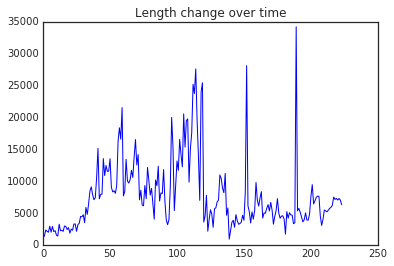

In [371]:
import numpy as np

x = range(len(length))
y = np.array(length)
plt.title("Length change over time")
plt.plot(x,y);

{'December 7': 14, 'January 6': 6, 'November 4': 1, 'January 12': 4, 'January 10': 2, 'January 17': 1, 'January 31': 2, 'January 22': 2, 'November 29': 1, 'November 8': 2, 'November 16': 1, 'November 14': 1, 'January 21': 2, 'January 5': 2, 'January 9': 3, 'January 24': 2, 'January 11': 2, 'January 25': 6, 'November 19': 1, 'December 6': 21, 'January 26': 1, 'February 2': 3, 'December 5': 15, 'January 7': 5, 'January 30': 2, 'December 9': 2, 'January 23': 2, 'January 20': 3, 'December 15': 1, 'February 27': 1, 'October 27': 1, 'January 27': 4, 'February 12': 1, 'January 8': 3, 'December 1': 6, 'February 24': 1, 'December 12': 1, 'November 6': 1, 'September 20': 2, 'November 11': 1, 'December 4': 10, 'January 29': 2, 'January 16': 1, 'December 31': 1, 'February 4': 2, 'December 19': 1, 'January 19': 3, 'January 14': 2, 'December 3': 23, 'December 8': 14, 'January 3': 4, 'October 17': 1, 'November 22': 1, 'January 15': 1, 'October 25': 1, 'January 4': 4, 'November 5': 1, 'February 6': 1,

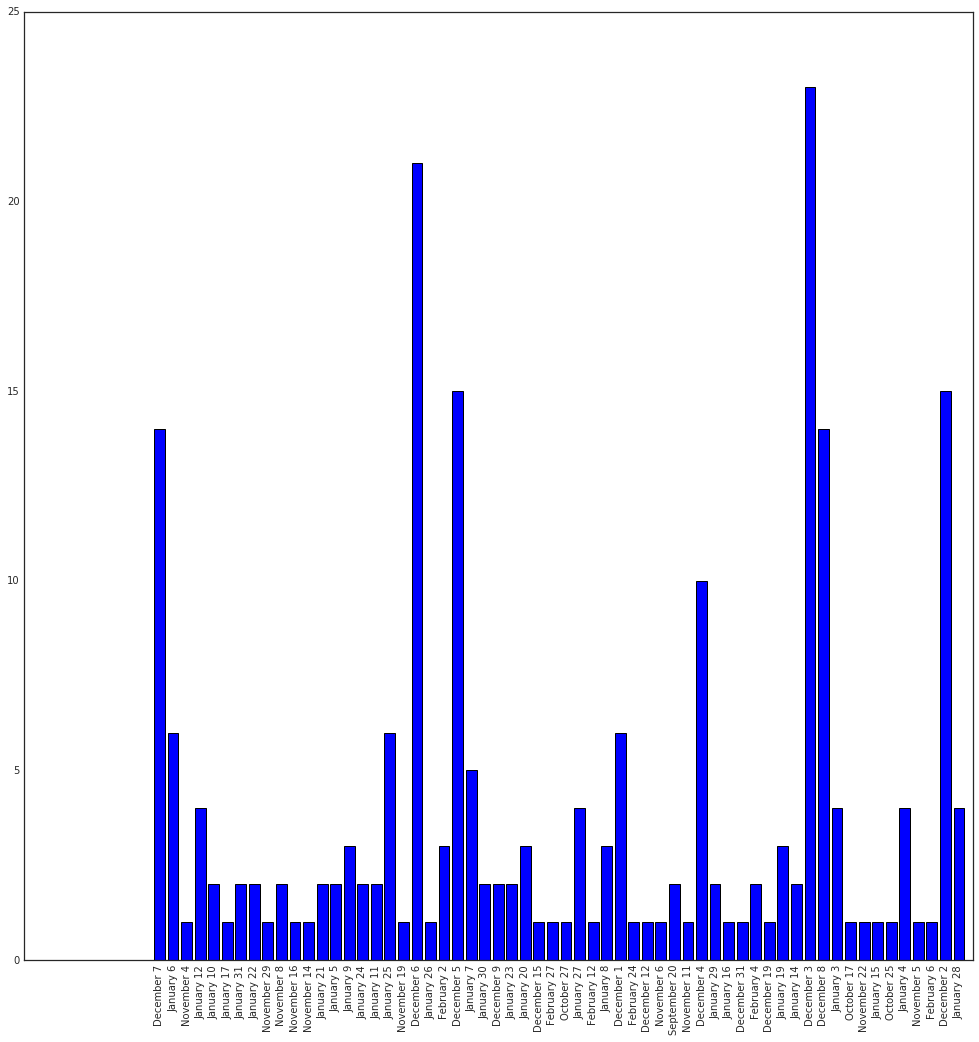

In [372]:
#graph dates of speeches

date_count = {}
for i in title1:
    date = i[1].strip()
    if date_count:
        if date in date_count:   
            date_count[date] = date_count[date] + 1
        else:
            date_count[date] = 1
    else:
        date_count[date] = 1
print (date_count)

# wildcard imports are an anti-pattern
# http://docs.quantifiedcode.com/python-code-patterns/maintainability/from_module_import_all_used.html
#from matplotlib import *

plt.figure(figsize=(17,17))

plt.bar(range(len(date_count)), date_count.values(), align='center')
plt.xticks(range(len(date_count)), date_count.keys(), rotation = 'vertical')

plt.show()


In [373]:
dates = pd.DataFrame({"Date": list(date_count.keys()), "Count": list(date_count.values())})

In [374]:
# Add a year to dates in Jan/Feb and reformat date to allow converstion to datetime
def hack_time(x):
    time_pieces = x.split(" ")
    month = time_pieces[0]
    day = time_pieces[1]
    if month in ["January", "February"]:
        return "%s/%s/%d" % (day, month[:3], 2016)
    else:
        return "%s/%s/%d" % (day, month[:3], 2015)

In [375]:
dates['time_hack'] = pd.to_datetime(dates.Date.apply(lambda x: hack_time(x)))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

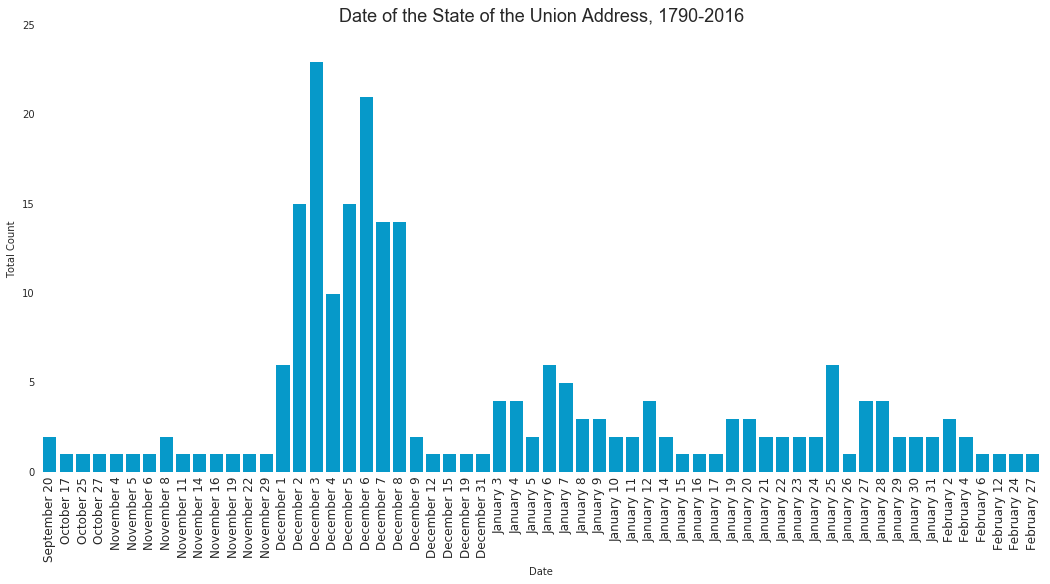

In [376]:
cool_blue = '#0699C9'
hot_red = '#DE182F'

plt.style.use('seaborn-white')

#sort by date and plot
ax = dates.sort_values(by="time_hack").plot(kind='bar', width=.8, x="Date", color=cool_blue,
                rot=90, legend=False, figsize=(18, 8), edgecolor="none")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Date of the State of the Union Address, 1790-2016", fontsize="18")
plt.ylabel("Total Count")
plt.xticks(fontsize="12")

### 

{'Netherlands': 32, 'Bahamas': 3, 'Dominican Republic': 9, 'Uruguay': 12, 'South Africa': 4, 'Morocco': 14, 'Belgium': 37, 'Hong Kong': 1, 'Nigeria': 4, 'Sweden': 32, 'Kosovo': 3, 'Angola': 4, 'Costa Rica': 17, 'Niger': 4, 'Yemen': 5, 'Serbia': 3, 'Cambodia': 3, 'Romania': 2, 'Somalia': 5, 'Czech Republic': 1, 'Austria': 46, 'Grenada': 5, 'Chile': 37, 'Philippines': 32, 'Ghana': 1, 'Northern Mariana Islands': 1, 'Uzbekistan': 1, 'Japan': 82, 'Cyprus': 4, 'Georgia': 25, 'Switzerland': 14, 'Zimbabwe': 3, 'China': 106, 'Solomon Islands': 1, 'Portugal': 34, 'Venezuela': 42, 'Dominica': 13, 'Honduras': 20, 'France': 110, 'Rwanda': 1, 'Ireland': 9, 'Uganda': 1, 'Greece': 30, 'Bermuda': 3, 'Cape Verde': 1, 'Ukraine': 9, 'Sierra Leone': 2, 'Kuwait': 4, 'Luxembourg': 1, 'New Zealand': 7, 'Chad': 1, 'Samoa': 15, 'Congo': 6, 'Finland': 5, 'Liberia': 18, 'Iraq': 21, 'Cuba': 74, 'Ecuador': 20, 'Belarus': 3, 'Albania': 1, 'Paraguay': 19, 'Lithuania': 2, 'Haiti': 14, 'United States': 216, 'Argentina'

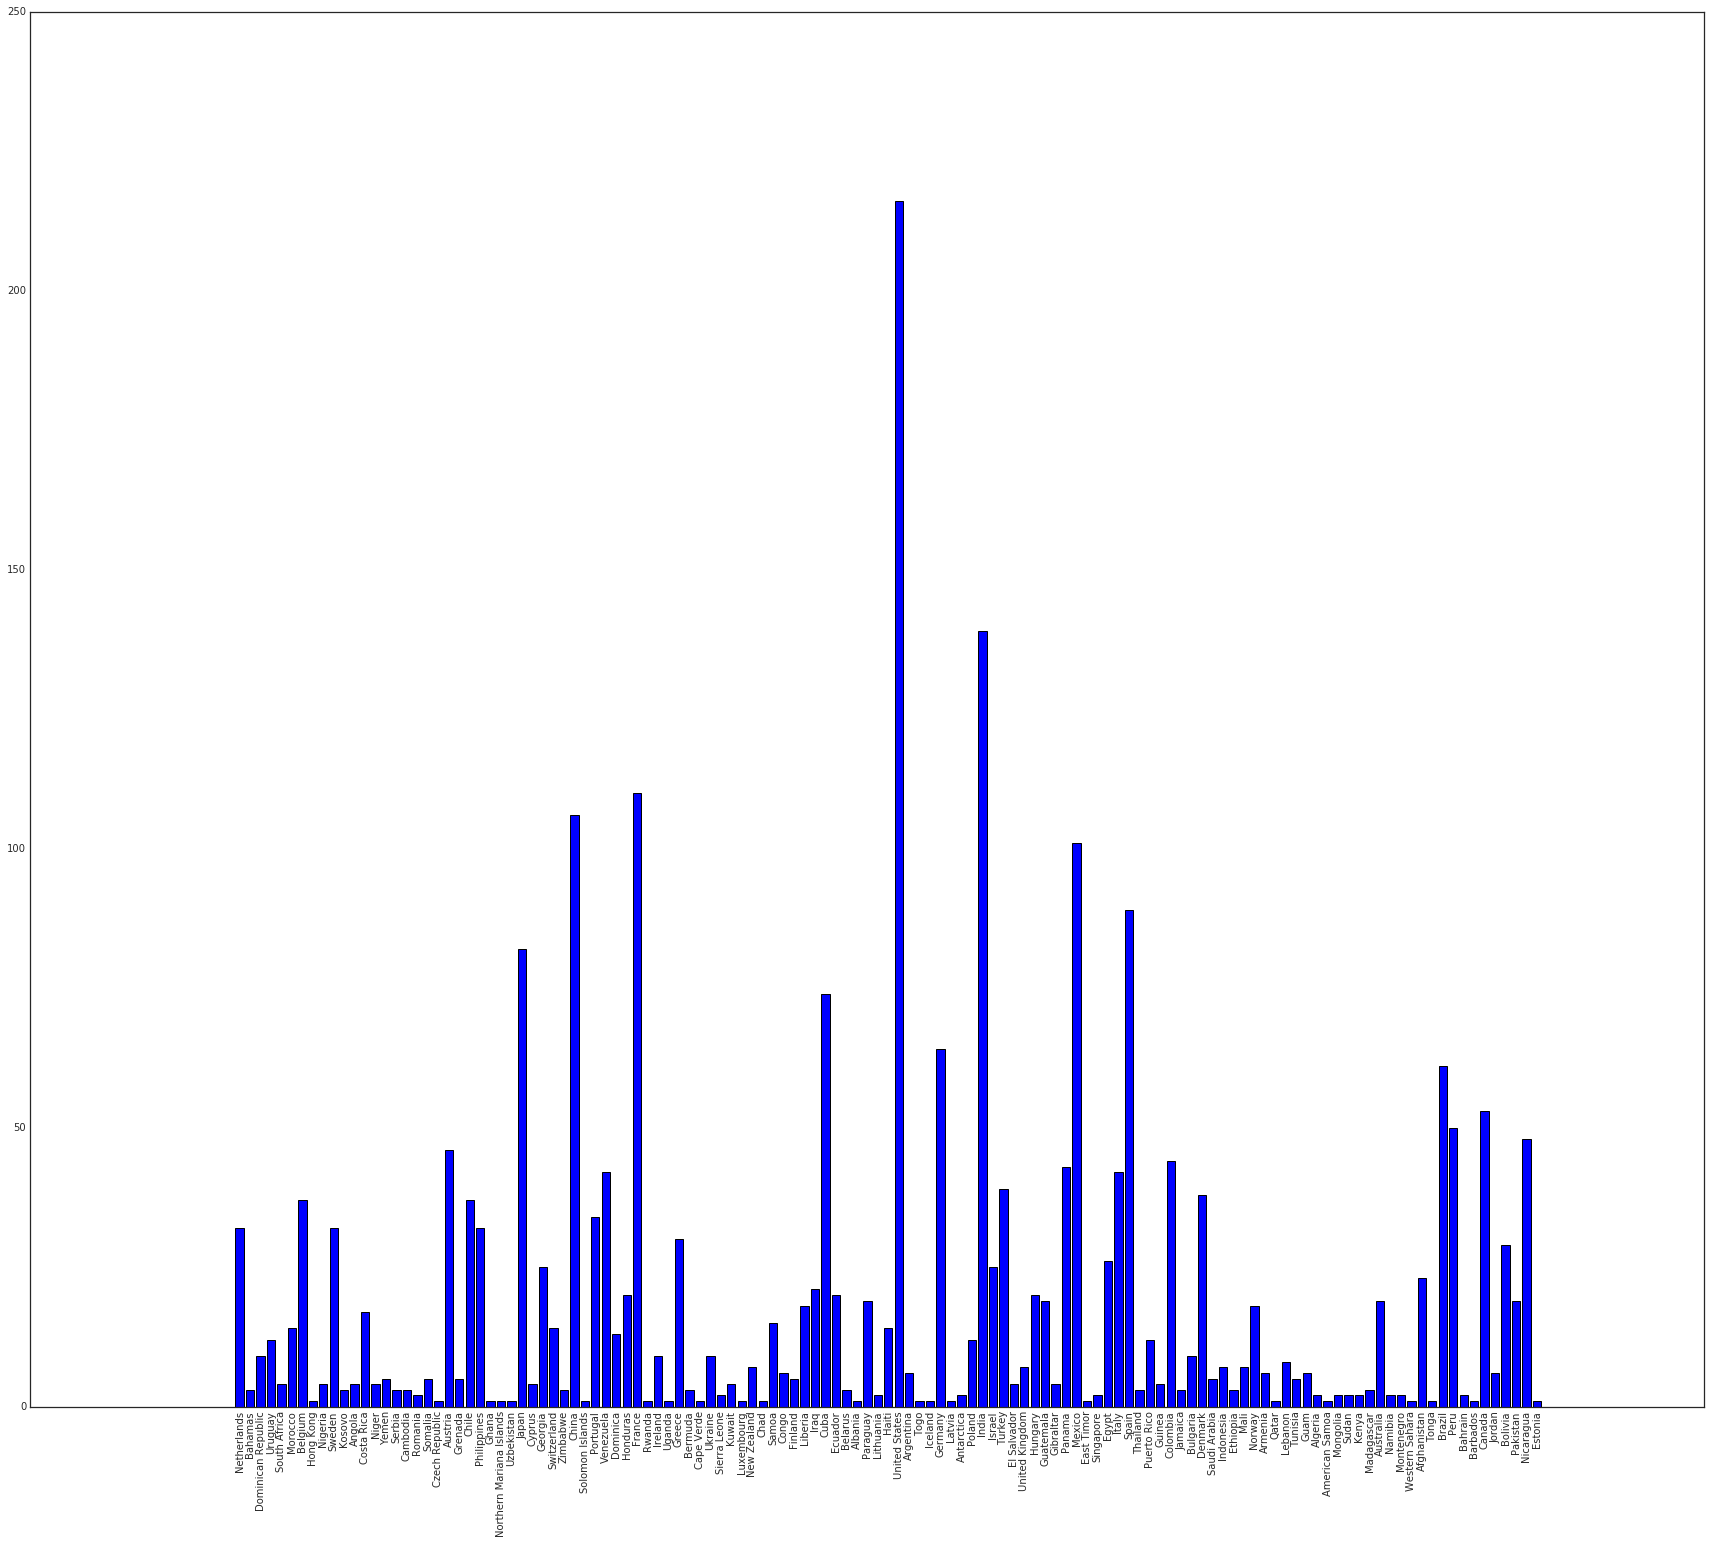

In [377]:
#something with countries mentioned
countries1 = open("countries.txt", "r")
countries = countries1.read()
countries1.close()
countries = countries.split("\n")
country_names = []
for line in countries:
    temp_line = line.split("|")
    country_names.append(temp_line[1])


country_mention_count = {}    
for country in country_names:
    for speech in content:
        if country in speech:
            if country in country_mention_count:
                country_mention_count[country] = country_mention_count[country] + 1
            else:
                country_mention_count[country] = 1
print (country_mention_count)
            
    
    
plt.figure(figsize=(30,25))

plt.bar(range(len(country_mention_count)), country_mention_count.values(), align='center')
plt.xticks(range(len(country_mention_count)), country_mention_count.keys(), rotation = 'vertical')

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

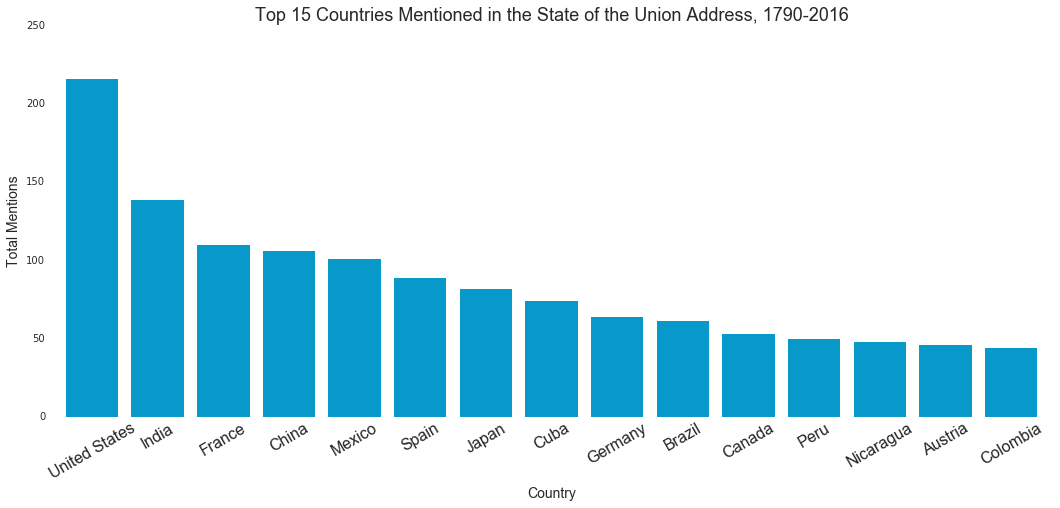

In [378]:
# Sort by number of mentions, reduce number of countries to make it easier to read
limit = 15
mentions = pd.DataFrame({"Country": list(country_mention_count.keys()), "Count": list(country_mention_count.values())})
ax = mentions.sort_values(by="Count", ascending=False)[:limit].plot(kind="bar", width=.8,
                                                         x="Country",
                                                         color=cool_blue,
                                                         rot=30, legend=False, figsize=(18, 7), edgecolor = "none")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Top %s Countries Mentioned in the State of the Union Address, 1790-2016" % limit, fontsize=18)
plt.ylabel("Total Mentions", fontsize=14)
plt.xlabel("Country", fontsize=14)
plt.xticks(fontsize = 16)

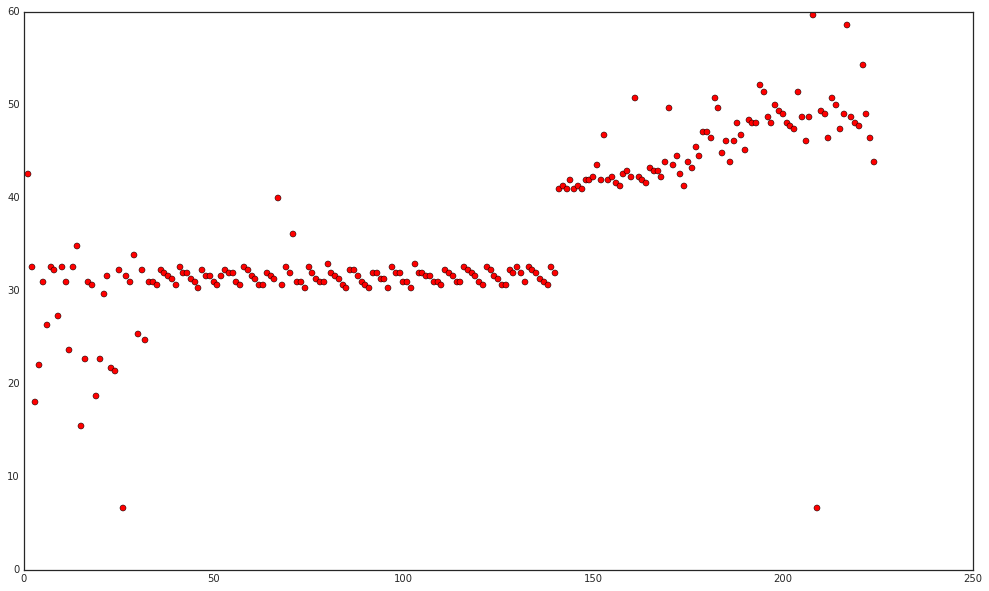

In [379]:
months = []
days = []
years = []
for i in title1:
    year = i[2]
    temp_date = i[1]
    temp_date = temp_date.strip().split(" ")
    months.append(temp_date[0])
    days.append(temp_date[1])
    years.append(year)

def translate(day, month, year):
    year = int(year)
    if month == "September" or month == "November":
        daysInMonth = 30
    elif month == "October" or month == "December" or month == "January":
        daysInMonth = 31
    elif month == "February":
        if year % 4 == 0:
            daysInMonth = 29
        else:
            daysInMonth = 28
    span = 9.99
    # Convert the left range into a 0-1 range (float)
    valueScaled = float(day) / float(daysInMonth)
    # Convert the 0-1 range into the scaled value.
    return (valueScaled * span)

scaled_date_final = []
for i in range(len(months)):
    day_value = days[i]
    month_value = months[i]
    year_value = years[i]
    scaled_day = translate(day_value, month_value, year_value)
    if month_value == "September":
        scaled_date_final.append(scaled_day)
    if month_value == "October":
        scaled_date_final.append(10 + scaled_day)
    if month_value == 'November':
        scaled_date_final.append(20 + scaled_day)
    if month_value == "December":
        scaled_date_final.append(30 + scaled_day)
    if month_value == "January":
        scaled_date_final.append(40 + scaled_day)
    if month_value == "February":
        scaled_date_final.append(50 + scaled_day)
        
#convert years to ordinal
year_ordinal = []
i = 0
for year in years:
    i = i + 1
    year_ordinal.append(i)

    

plt.figure(figsize=(17,10))    
plt.plot(year_ordinal, scaled_date_final, 'ro')
plt.show()